In [3]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [6]:
data = pd.read_csv('/content/IRIS.csv')

In [7]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
data.shape

(150, 5)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


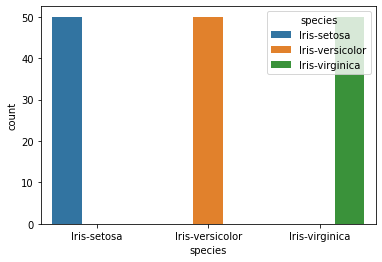

In [10]:
sns.countplot('species', hue='species',data=dataset)

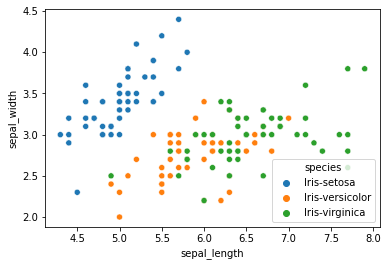

In [12]:
sns.scatterplot(x='sepal_length',y='sepal_width',hue='species',data=dataset)


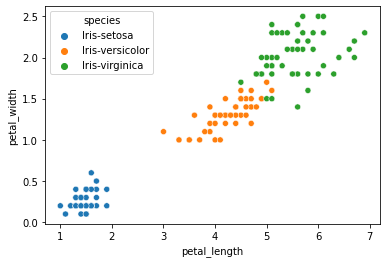

In [14]:
sns.scatterplot(x='petal_length',y='petal_width',hue='species',data=dataset)


In [15]:
data.isnull().sum()


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [16]:
X = data.drop('species',axis=1)
Y = data['species']

In [17]:
print(X)


     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


In [18]:
print(Y)


0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object


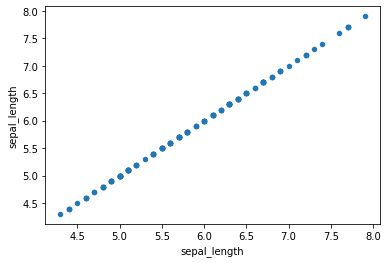

In [58]:
data.plot(kind='scatter',x='sepal_length', y='sepal_length')

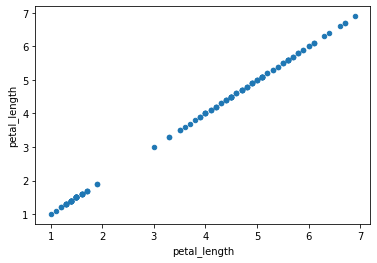

In [60]:
data.plot(kind='scatter',x='petal_length', y='petal_length')

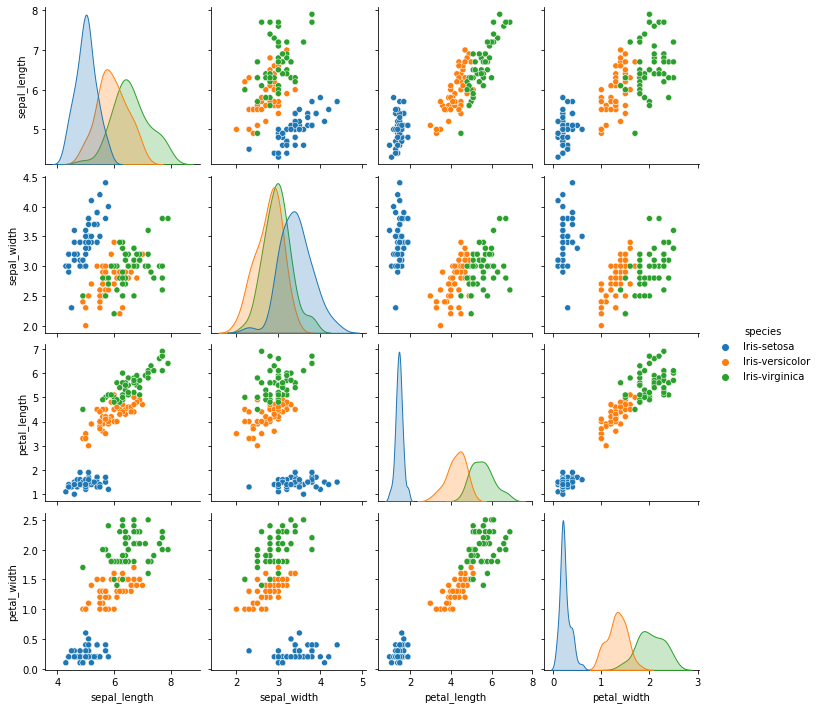

In [62]:
sns.pairplot(data=data, hue='species')


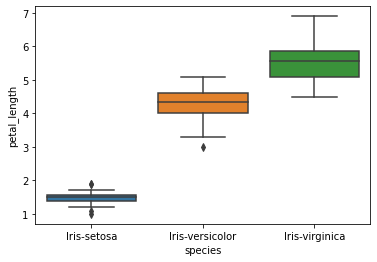

In [64]:
sns.boxplot(x='species', y='petal_length', data=data)


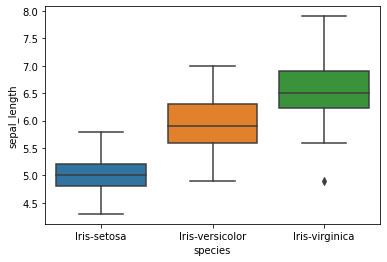

In [65]:
sns.boxplot(x='species', y='sepal_length', data=data)


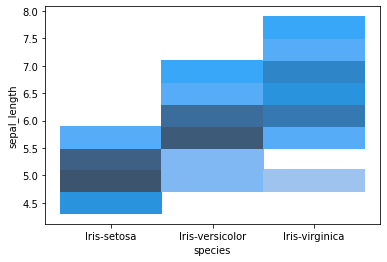

In [66]:
sns.histplot(x='species', y='sepal_length', data=data)

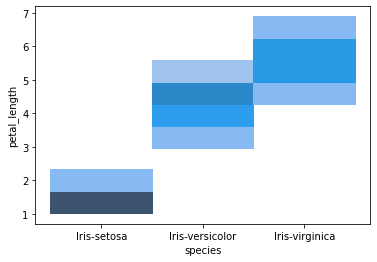

In [67]:
sns.histplot(x='species', y='petal_length', data=data)

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2)

In [20]:
print(X.shape,X_train.shape,X_test.shape)

(150, 4) (105, 4) (45, 4)


In [21]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [23]:
score=knn_model.score(X_train,Y_train)*100
print("score",score)

score 94.28571428571428


In [24]:
knn_model.score(X_test,Y_test)*100

100.0

In [25]:
prediction = knn_model.predict(X_test)

In [26]:
cross_check = pd.DataFrame({'Actual' : Y_test, 'Predicted': prediction})
cross_check

,Actual,Predicted
6,Iris-setosa,Iris-setosa
3,Iris-setosa,Iris-setosa
113,Iris-virginica,Iris-virginica
12,Iris-setosa,Iris-setosa
24,Iris-setosa,Iris-setosa
129,Iris-virginica,Iris-virginica
25,Iris-setosa,Iris-setosa
108,Iris-virginica,Iris-virginica
128,Iris-virginica,Iris-virginica
45,Iris-setosa,Iris-setosa


In [29]:
from sklearn.metrics import confusion_matrix
predict = knn_model.predict(X_test)
con = confusion_matrix(Y_test,prediction)


In [30]:
con

array([[17,  0,  0],
       [ 0, 15,  0],
       [ 0,  0, 13]])

Text(114.0, 0.5, 'Actual')

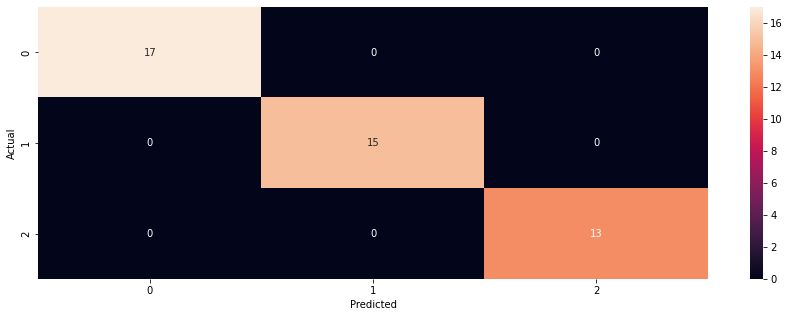

In [31]:
mp.figure(figsize=(15,5))
sb.heatmap(cm,annot=True)
mp.xlabel('Predicted')
mp.ylabel('Actual')


Logistic Regression

In [33]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

y_pred = classifier.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [36]:
# Summary of the predictions made by the classifier
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       1.00      0.93      0.97        15
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

[[17  0  0]
 [ 0 14  1]
 [ 0  0 13]]


In [40]:
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,Y_test))

accuracy is 0.9777777777777777


**Naive Bayes** 

In [42]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

y_pred = classifier.predict(X_test)

In [44]:
# Summary of the predictions made by the classifier
print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       1.00      0.93      0.97        15
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

[[17  0  0]
 [ 0 14  1]
 [ 0  0 13]]


In [47]:
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,Y_test))

accuracy is 0.9777777777777777


# Decision tree classifier

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
dtree = DecisionTreeClassifier()

In [52]:
dtree.fit(X_train,Y_train)


DecisionTreeClassifier()

In [53]:
prediction = dtree.predict(X_test)

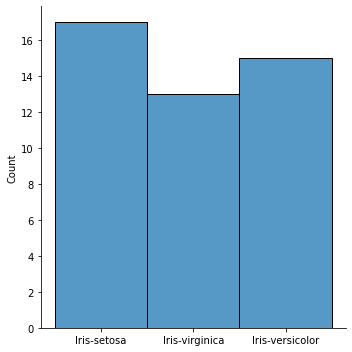

In [54]:
sns.displot(prediction)


In [56]:
#Accuracy score
print(accuracy_score(Y_test,prediction))


0.9555555555555556
